# Deep Learning Fundamentals - Coursework Final

## Lim Zhao Hong, Student ID: 20065320

## Dataset https://drive.google.com/drive/folders/1cLUaXGRDHpt-1JVSCSlBLFEeX6U5s8v-?usp=sharing

## Import Library and Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# path to images
path = 'C:/Users/Admin/Desktop/Republic Poly/FA1-1-C2349C-A Deep Learning Fundamentals/CWF/Dog Cat Panda/animals/'

# animal categories
categories = ['dogs', 'panda', 'cats']

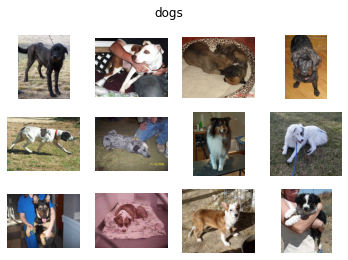

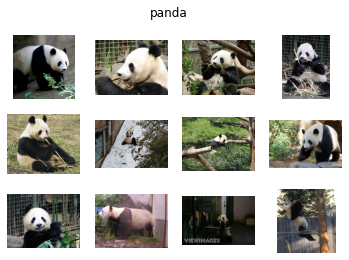

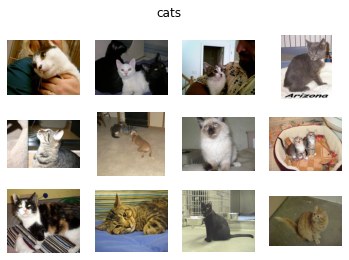

In [2]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

# Data Preparation

In [3]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


In [4]:
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['C:/Users/Admin/Desktop/Republic Poly/FA1-1-C2349C-A Deep Learning Fundamentals/CWF/Dog Cat Panda/animals/panda/panda_00576.jpg', 1], ['C:/Users/Admin/Desktop/Republic Poly/FA1-1-C2349C-A Deep Learning Fundamentals/CWF/Dog Cat Panda/animals/dogs/dogs_00350.jpg', 0], ['C:/Users/Admin/Desktop/Republic Poly/FA1-1-C2349C-A Deep Learning Fundamentals/CWF/Dog Cat Panda/animals/cats/cats_00849.jpg', 2], ['C:/Users/Admin/Desktop/Republic Poly/FA1-1-C2349C-A Deep Learning Fundamentals/CWF/Dog Cat Panda/animals/dogs/dogs_00702.jpg', 0], ['C:/Users/Admin/Desktop/Republic Poly/FA1-1-C2349C-A Deep Learning Fundamentals/CWF/Dog Cat Panda/animals/panda/panda_00952.jpg', 1], ['C:/Users/Admin/Desktop/Republic Poly/FA1-1-C2349C-A Deep Learning Fundamentals/CWF/Dog Cat Panda/animals/cats/cats_00447.jpg', 2], ['C:/Users/Admin/Desktop/Republic Poly/FA1-1-C2349C-A Deep Learning Fundamentals/CWF/Dog Cat Panda/animals/cats/cats_00374.jpg', 2], ['C:/Users/Admin/Desktop/Republic Poly/FA1-1-C2349C-A Deep Learn

In [5]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

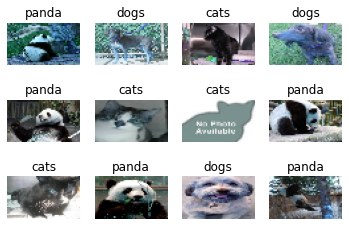

In [6]:
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [7]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
trainY = np_utils.to_categorical(trainY, 3)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2379, 32, 55, 3)
(595, 32, 55, 3)
(2379, 3)
(595,)


In [9]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 54, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 26, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 13, 32)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 13, 32)         0         
                                                                 
 flatten (Flatten)           (None, 2912)              0

In [10]:
history = model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)
 

Epoch 1/25
75/75 [==============================] - 2s 17ms/step - loss: 1.0181 - accuracy: 0.4662
Epoch 2/25
75/75 [==============================] - 1s 17ms/step - loss: 0.8923 - accuracy: 0.5536
Epoch 3/25
75/75 [==============================] - 1s 17ms/step - loss: 0.8114 - accuracy: 0.5729
Epoch 4/25
75/75 [==============================] - 1s 17ms/step - loss: 0.7626 - accuracy: 0.6078
Epoch 5/25
75/75 [==============================] - 1s 18ms/step - loss: 0.7480 - accuracy: 0.6129
Epoch 6/25
75/75 [==============================] - 1s 17ms/step - loss: 0.7103 - accuracy: 0.6410
Epoch 7/25
75/75 [==============================] - 1s 17ms/step - loss: 0.6916 - accuracy: 0.6456
Epoch 8/25
75/75 [==============================] - 1s 18ms/step - loss: 0.6814 - accuracy: 0.6562
Epoch 9/25
75/75 [==============================] - 2s 20ms/step - loss: 0.6296 - accuracy: 0.6961
Epoch 10/25
75/75 [==============================] - 1s 18ms/step - loss: 0.6506 - accuracy: 0.6982
Epoch 11/

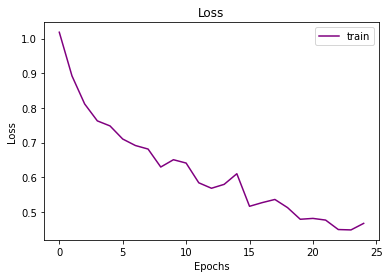

In [11]:
plt.plot(history.history["loss"],c = "purple")
#plt.plot(history.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

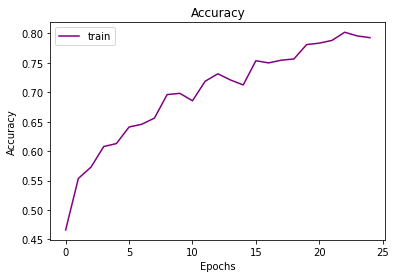

In [12]:
plt.plot(history.history["accuracy"],c = "purple")
#plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

19/19 [==============================] - 0s 5ms/step


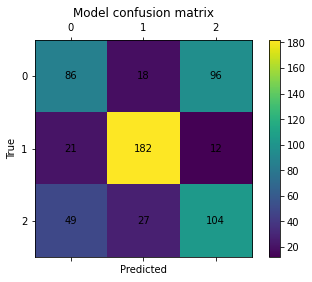

Accuracy : 62.52%


In [13]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
#ax.set_xticklabels([''] + categories)
#ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

## Hyperparameters tuning:
1) Change dropout
2) Change optimiser to RMSProp
3) Remove learning rate
4) Add one more filter layer

In [14]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu')) ##Add layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4)) ##Change drop out
model.add(Dense(3, activation='softmax'))

#optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999) ## remove learning rate
model.compile(loss='categorical_crossentropy', optimizer= 'RMSprop', metrics=['accuracy']) ## Change optimiser to RMSProp

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 31, 54, 32)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 26, 32)        4128      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 13, 32)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 12, 32)         4128      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 6, 32)        

In [15]:
history1 = model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
75/75 [==============================] - 2s 18ms/step - loss: 0.9364 - accuracy: 0.5082
Epoch 2/25
75/75 [==============================] - 1s 17ms/step - loss: 0.7997 - accuracy: 0.5893
Epoch 3/25
75/75 [==============================] - 1s 17ms/step - loss: 0.7474 - accuracy: 0.6217
Epoch 4/25
75/75 [==============================] - 1s 17ms/step - loss: 0.7090 - accuracy: 0.6385
Epoch 5/25
75/75 [==============================] - 1s 17ms/step - loss: 0.6742 - accuracy: 0.6641
Epoch 6/25
75/75 [==============================] - 1s 17ms/step - loss: 0.6543 - accuracy: 0.6780
Epoch 7/25
75/75 [==============================] - 1s 18ms/step - loss: 0.6251 - accuracy: 0.6873
Epoch 8/25
75/75 [==============================] - 1s 17ms/step - loss: 0.6125 - accuracy: 0.7087
Epoch 9/25
75/75 [==============================] - 1s 18ms/step - loss: 0.5848 - accuracy: 0.7348
Epoch 10/25
75/75 [==============================] - 1s 18ms/step - loss: 0.5760 - accuracy: 0.7264
Epoch 11/

19/19 [==============================] - 0s 5ms/step


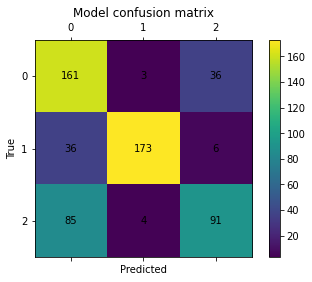

Accuracy : 71.43%


In [16]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
#ax.set_xticklabels([''] + categories)
#ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

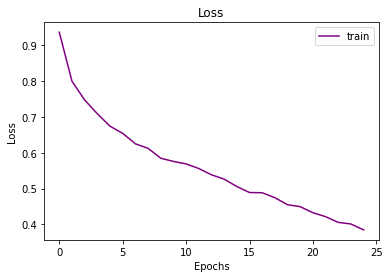

In [17]:
plt.plot(history1.history["loss"],c = "purple")
#plt.plot(history1.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

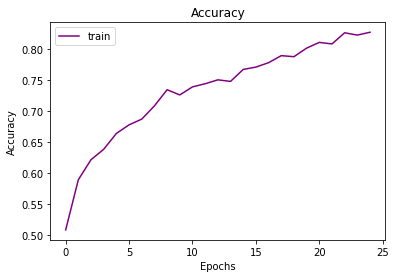

In [18]:
plt.plot(history1.history["accuracy"],c = "purple")
#plt.plot(history1.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

# Transfer Learning using VGG16 architecture

In [19]:
from keras.applications import vgg16

# importing VGG16 from keras with pre-trained weights that is trained on imagenet
# include_top > whether to include the 3 fully-connected layers at the top of the network.
# weights > to use the weights from pre-training on Imagenet
vggModel = vgg16.VGG16(include_top=True, weights='imagenet')

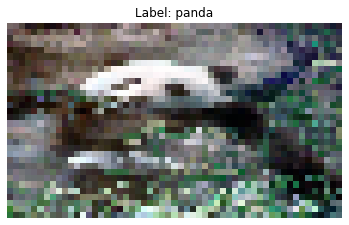

In [20]:
# Randomly select an image with label for predict by origin VGG16, to checkout the correctiveness 
import random
imgSize = len(data)

selected = random.randint(0, imgSize)

img = data[selected]

plt.imshow(img)

plt.axis('off')

plt.title('Label: {}'.format(categories[labels[selected]]))

plt.show()

### Prediction 

In [21]:
#### Preparing the image for prediction into VGG16
import numpy as np
from PIL import Image
from keras.preprocessing import image

# Create an image memory object
im = Image.fromarray(img, 'RGB')

# 224x224 is the default image size required by VGG16
im = im.resize((224, 224))
x = np.array(im)

# Add a fourth dimension (since Keras expects a list of images)
x = np.expand_dims(x, axis=0)
#im = Image.fromarray((x * 255).astype(np.uint8))

# Normalize the input image's pixel values to the range used when training the neural network
# This step is required if you are using the base VGG16 model without further training
x = vgg16.preprocess_input(x)

In [22]:
# Run the image through the deep neural network to make a prediction
predictions = vggModel.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = vgg16.decode_predictions(predictions)

for imagenet_id, name, likelihood in predicted_classes[0]:
    print("Prediction: {} - {:2f}%".format(name, likelihood*100))

1/1 [==============================] - 0s 226ms/step
Prediction: chainlink_fence - 31.374061%
Prediction: spider_web - 28.536674%
Prediction: stole - 13.717702%
Prediction: poncho - 8.013172%
Prediction: wool - 2.280564%


# Transfer Learning using VGG19 architecture

## The concept of the VGG19 model (also VGGNet-19) is the same as the VGG16 except that it supports 19 layers. The “16” and “19” stand for the number of weight layers in the model (convolutional layers). This means that VGG19 has three more convolutional layers than VGG16

In [23]:
from keras.applications import vgg19

# importing VGG16 from keras with pre-trained weights that is trained on imagenet
# include_top > whether to include the 3 fully-connected layers at the top of the network.
# weights > to use the weights from pre-training on Imagenet
vggModel1 = vgg19.VGG19(include_top=True, weights='imagenet')
#IMAGE_SIZE = [224, 224] #Default image size for VGG16
#vggModel = vgg19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

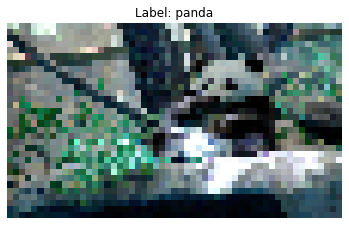

In [24]:
# Randomly select an image with label for predict by VGG19, to checkout the correctiveness 
import random
imgSize = len(data)

selected = random.randint(0, imgSize)

img = data[selected]

plt.imshow(img)

plt.axis('off')

plt.title('Label: {}'.format(categories[labels[selected]]))

plt.show()

# Data augmentation using ImageDataGenerator (Geometric transformation)

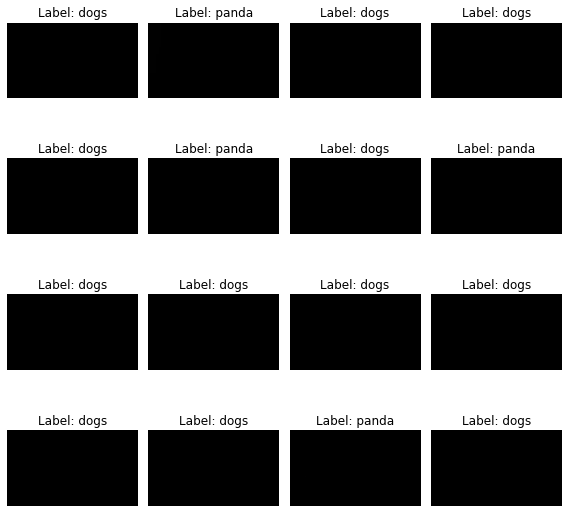

In [25]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.utils.np_utils as ku

# Initialize the ImageDataGenerator for geometric transformation
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=45,
                             width_shift_range=[-8, 8],
                             height_shift_range=[-8, 8],
                             shear_range=45,
                             zoom_range=[0.75, 1.25],
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2)

# Convert the labels to one-hot vector
y_train_cat = ku.to_categorical(trainY)

for batch_x, batch_y in datagen.flow(trainX, y_train_cat, batch_size=16):
    plt.figure(figsize=(8, 8))
    for i in range(16):
        x = batch_x[i]
        y = batch_y[i]
        index = np.argmax(y)
        plt.subplot(4, 4, i+1)
        plt.imshow(x)
        plt.axis('off')
        plt.title('Label: {}'.format(categories[index]))
    plt.tight_layout()
    plt.show()
    break

# Data augmentation using ImageDataGenerator (Colour space transformation)

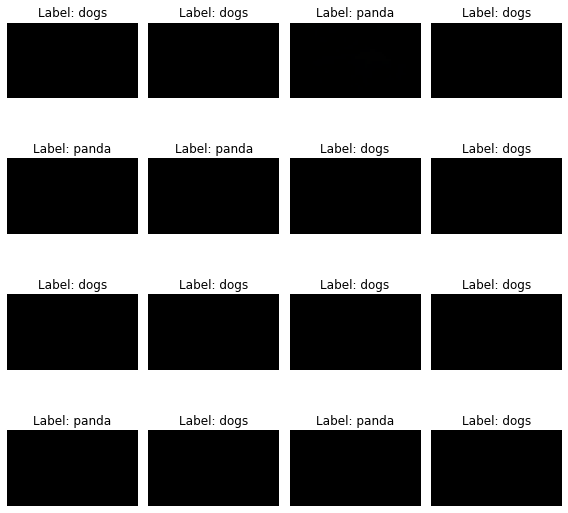

In [26]:
# Initialize the ImageDataGenerator for colour space transformation
datagen = ImageDataGenerator(rescale=1./255,
                             channel_shift_range=0.25,
                             brightness_range=[0.2, 1.2])

for batch_x, batch_y in datagen.flow(trainX, y_train_cat, batch_size=16):
    plt.figure(figsize=(8, 8))
    for i in range(16):
        x = batch_x[i]
        y = batch_y[i]
        index = np.argmax(y)
        plt.subplot(4, 4, i+1)
        plt.imshow(x)
        plt.axis('off')
        plt.title('Label: {}'.format(categories[index]))
    plt.tight_layout()
    plt.show()
    break

# Conclusion

### Hyperparameter tuning with RMSProp optimiser, adjustment in learning rate/dropout and an additional layer provide a better validation accuracy. <br> 